/tmp/ipykernel_49/3809097867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")


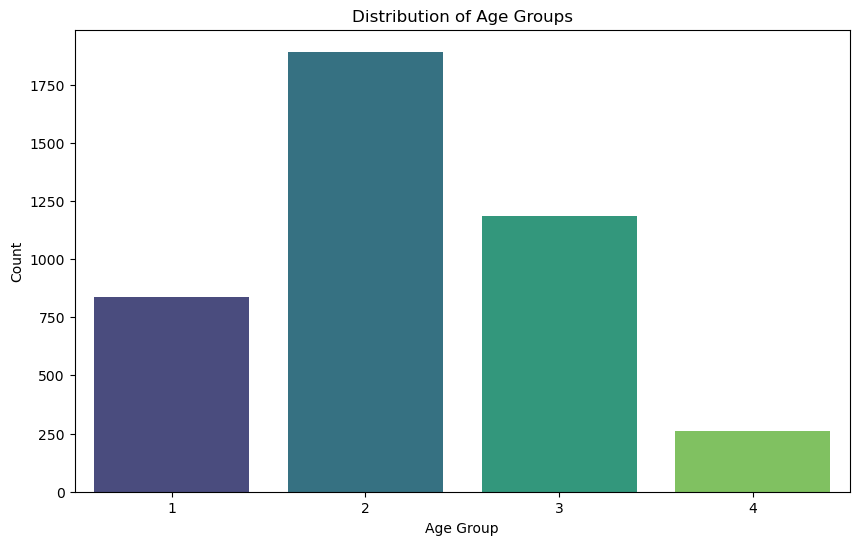

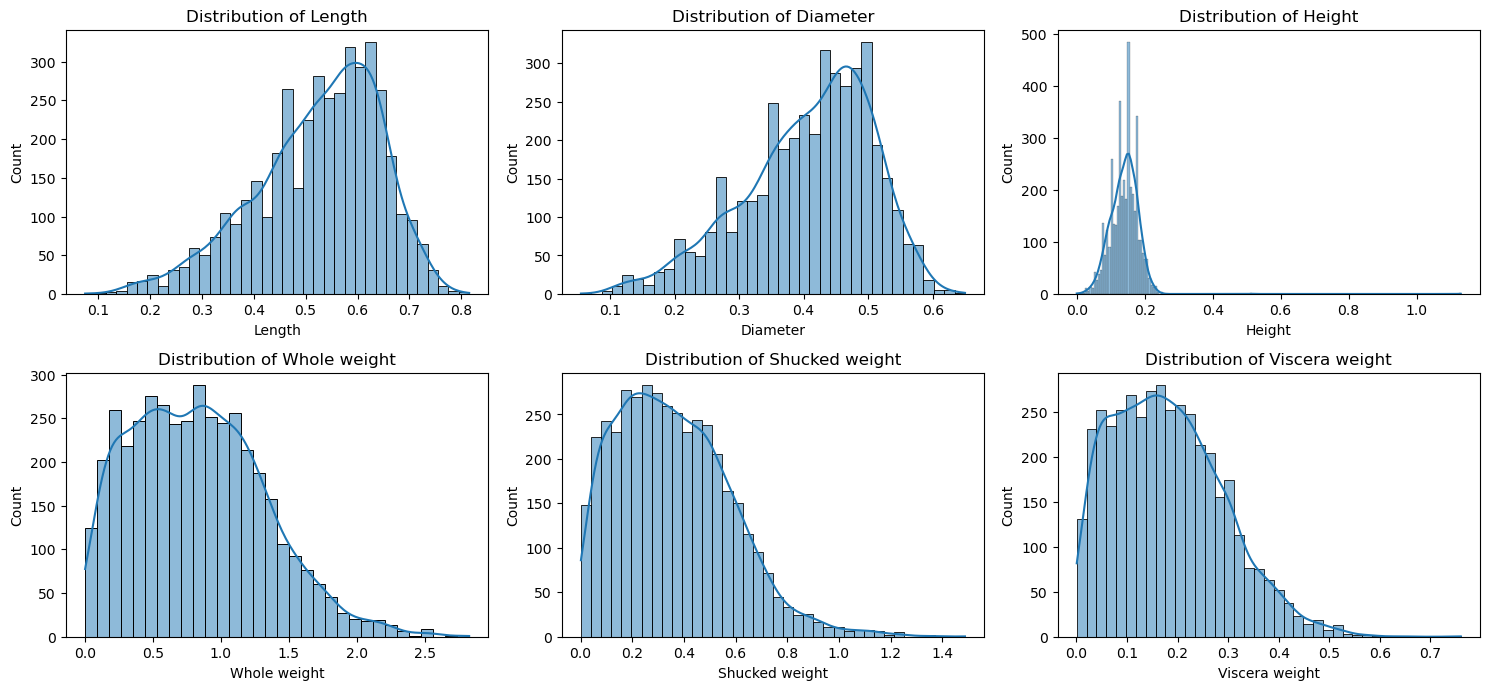

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")
# Load the dataset
url = "abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv(url, names=column_names)

# Convert the 'Rings' feature to categorical class labels as per the given age groups
abalone_data['Age Group'] = pd.cut(abalone_data['Rings'], bins=[-1, 7, 10, 15, np.inf], labels=[1, 2, 3, 4])

#Clean up data - convert 'M', 'F', and 'I' to 0, 1, and 2
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 0, 'F': 1, 'I':2})

# Visualize the distribution of the age groups (classes)
plt.figure(figsize=(10, 6))
age_group_distribution = abalone_data['Age Group'].value_counts().sort_index()
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig("Distribution of Age Groups.jpg")
plt.show()

# Visualize the distribution of features using histograms or boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(column_names[1:-2], 1):  # Skip 'Sex' and 'Rings' which are not continuous
    plt.subplot(3, 3, i)
    sns.histplot(abalone_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig("Distribution of feature.jpg")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
# # Split the data into features and labels
X = abalone_data.iloc[:,:-2]
y = abalone_data['Age Group']

In [8]:
def tree_model(X,y,random_state):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)
    
    for i in range(2,7):
        # Create a Decision Tree Classifier
        tree = DecisionTreeClassifier(max_depth=i,random_state=4)
        tree.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = tree.predict(X_test)

        # Calculate and store the accuracy for this run
        accuracy = accuracy_score(y_test, y_pred)
        results.append((i, accuracy))
    
    # Find the best hyperparameter setting based on accuracy
    best_hyperparameter, best_accuracy = max(results, key=lambda x: x[1])
    print(f"best_max_depth : {best_hyperparameter} , best_accuracy : {best_accuracy}")
    return best_accuracy

accuracy_test=[]
for _ in range(30):
    best_accuracy = tree_model(X,y,_)
    accuracy_test.append(best_accuracy)
avg_accuracy_test = np.mean(accuracy_test)
std_accuracy_test = np.std(accuracy_test)
print("-"*10)
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(avg_accuracy_test, std_accuracy_test))

best_max_depth : 6 , best_accuracy : 0.6199880311190904
best_max_depth : 5 , best_accuracy : 0.6169958108916817
best_max_depth : 4 , best_accuracy : 0.6086175942549371
best_max_depth : 4 , best_accuracy : 0.6074207061639737
best_max_depth : 5 , best_accuracy : 0.6337522441651705
best_max_depth : 6 , best_accuracy : 0.6265709156193896
best_max_depth : 4 , best_accuracy : 0.6253740275284261
best_max_depth : 4 , best_accuracy : 0.6128067025733094
best_max_depth : 6 , best_accuracy : 0.6163973668461998
best_max_depth : 6 , best_accuracy : 0.6175942549371634
best_max_depth : 6 , best_accuracy : 0.6259724715739078
best_max_depth : 4 , best_accuracy : 0.6199880311190904
best_max_depth : 6 , best_accuracy : 0.6265709156193896
best_max_depth : 4 , best_accuracy : 0.6373429084380611
best_max_depth : 3 , best_accuracy : 0.6152004787552364
best_max_depth : 3 , best_accuracy : 0.6205864751645721
best_max_depth : 5 , best_accuracy : 0.6295631358467983
best_max_depth : 6 , best_accuracy : 0.624775583

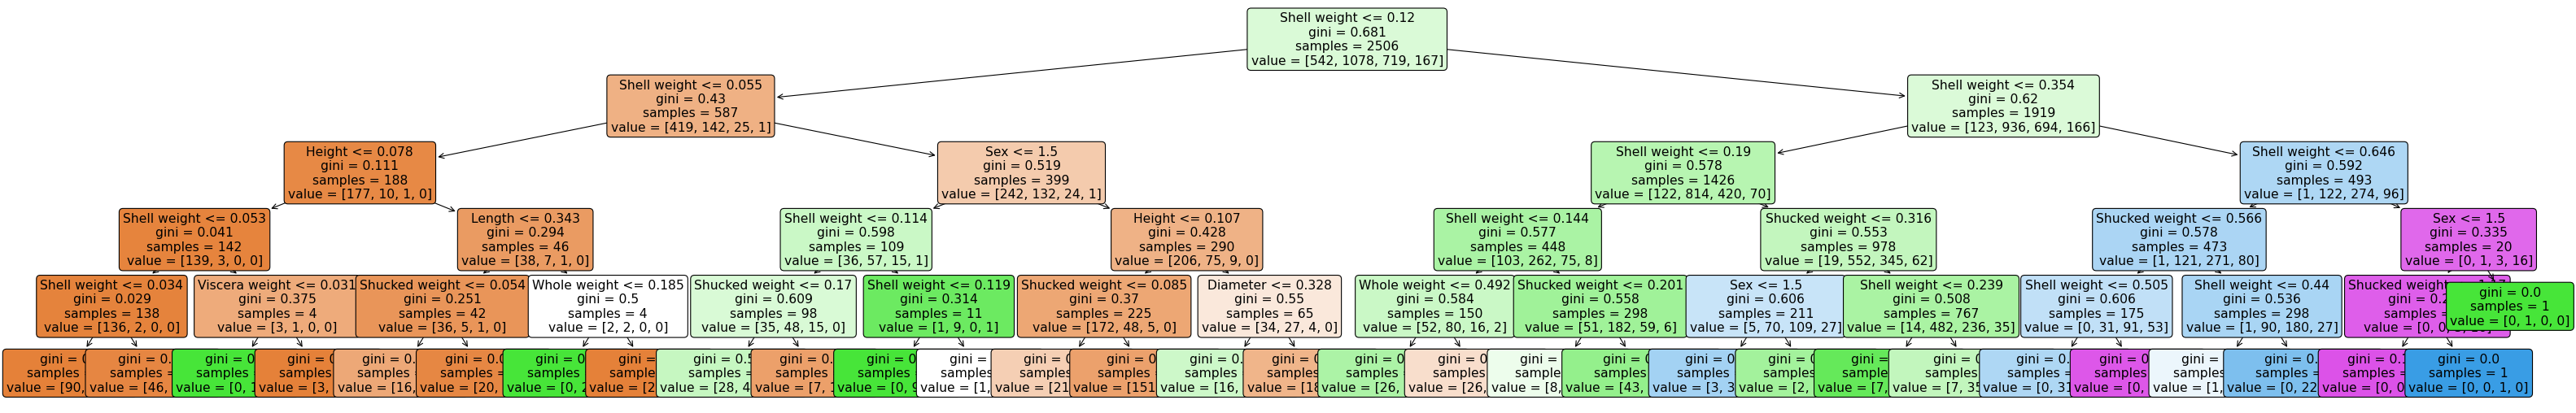

In [9]:
# plotbest tree using the chosen hyperparameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
best_tree = DecisionTreeClassifier(max_depth=5,random_state=4)
best_tree.fit(X_train, y_train)
plt.figure(figsize=(50,8),dpi=80)
plot_tree(best_tree,filled=True,rounded=True,feature_names=X_train.columns,fontsize=14)
plt.savefig("tree_plot.jpg")
plt.show()

In [10]:
tree_rules = export_text(best_tree, feature_names=list(X.columns))
print(tree_rules)

|--- Shell weight <= 0.12
|   |--- Shell weight <= 0.05
|   |   |--- Height <= 0.08
|   |   |   |--- Shell weight <= 0.05
|   |   |   |   |--- Shell weight <= 0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Shell weight >  0.03
|   |   |   |   |   |--- class: 1
|   |   |   |--- Shell weight >  0.05
|   |   |   |   |--- Viscera weight <= 0.03
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Viscera weight >  0.03
|   |   |   |   |   |--- class: 1
|   |   |--- Height >  0.08
|   |   |   |--- Length <= 0.34
|   |   |   |   |--- Shucked weight <= 0.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Shucked weight >  0.05
|   |   |   |   |   |--- class: 1
|   |   |   |--- Length >  0.34
|   |   |   |   |--- Whole weight <= 0.19
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Whole weight >  0.19
|   |   |   |   |   |--- class: 1
|   |--- Shell weight >  0.05
|   |   |--- Sex <= 1.50
|   |   |   |--- Shell weight <= 0.11
|   |   |   |   |--- Shucked weight <= 

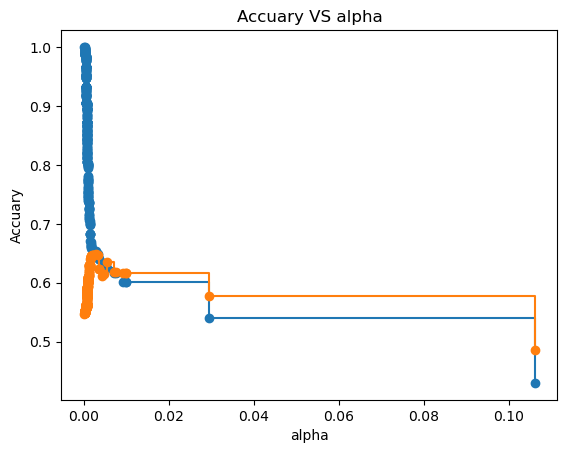

In [11]:
# improving performance further by post-pruning
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=4)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.plot(ccp_alphas,train_acc,marker="o",label="train",drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,marker="o",label="test",drawstyle="steps-post")
plt.ylabel("Accuary")
plt.xlabel("alpha")
plt.title("Accuary VS alpha")
plt.savefig("Accuary VS alpha.jpg")
plt.show()

In [12]:
best_ccp_alphas=ccp_alphas[test_acc.index(max(test_acc))]
best_alphas_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alphas,random_state=4)
accuracy_test=[]
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    best_alphas_tree.fit(X_train,y_train)
    best_accuracy=best_alphas_tree.score(X_test,y_test)
    accuracy_test.append(best_accuracy)
avg_accuracy_test = np.mean(accuracy_test)
std_accuracy_test = np.std(accuracy_test)
print("After by post-pruning")
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(avg_accuracy_test, std_accuracy_test))

After by post-pruning
Average accuracy (Test): 0.6231 ± 0.0121


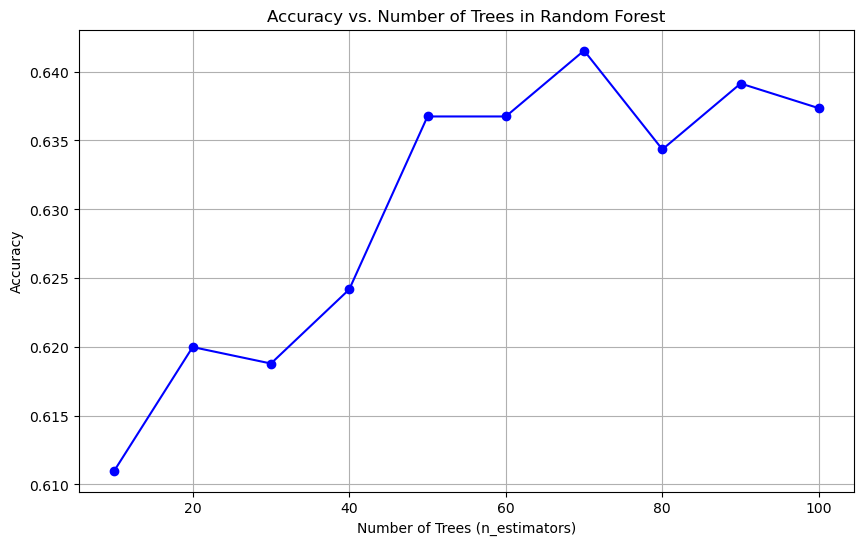

In [13]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Define a range of n_estimators (number of trees)
n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Lists to store accuracy scores for each n_estimators value
accuracy_scores = []

# Train Random Forest with different n_estimators values and record accuracy
for n_estimators in n_estimators_range:
    # Create and train the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=4)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores vs. the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig("Accuracy vs. Number of Trees in Random Forest.jpg")
plt.show()


In [14]:
accuracy_test=[]
clf = RandomForestClassifier(n_estimators=70, random_state=4)
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    clf.fit(X_train, y_train)
    clf_accuracy=clf.score(X_test,y_test)
    accuracy_test.append(clf_accuracy)
avg_accuracy_test = np.mean(accuracy_test)
std_accuracy_test = np.std(accuracy_test)
print("RandomForestClassifier")
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(avg_accuracy_test, std_accuracy_test))

RandomForestClassifier
Average accuracy (Test): 0.6279 ± 0.0093


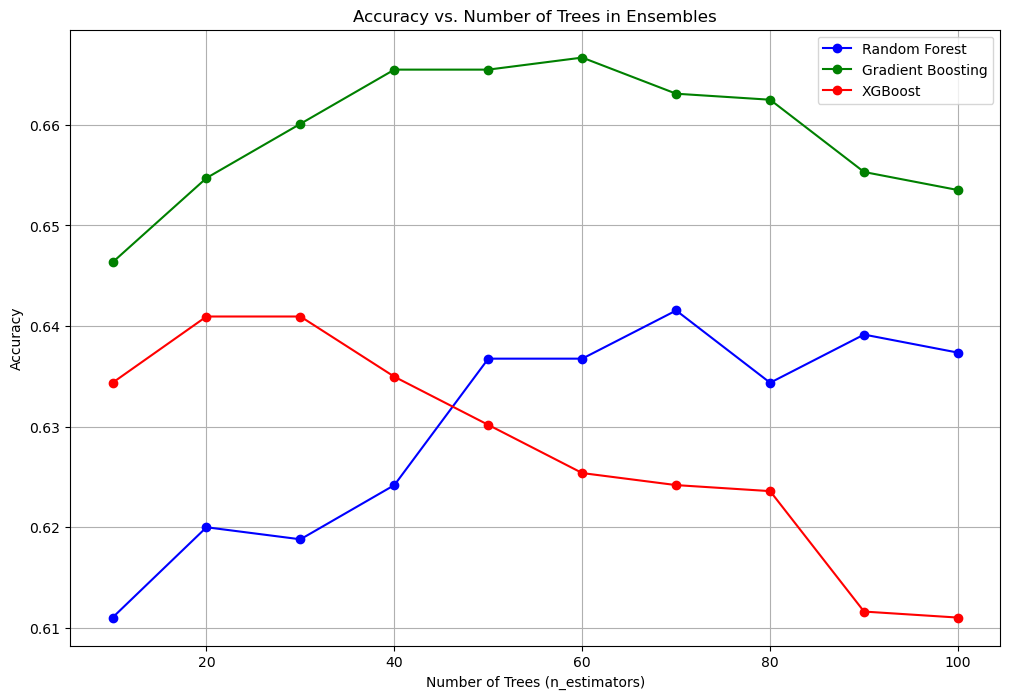

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Lists to store accuracy scores for each algorithm
rf_accuracy_scores = []
gb_accuracy_scores = []
xgb_accuracy_scores = []

# Train classifiers and record accuracy for each algorithm
for n_estimators in n_estimators_range:
    # Random Forest
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=4)
    rf_clf.fit(X_train, y_train)
    rf_pred = rf_clf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_accuracy_scores.append(rf_accuracy)

    # Gradient Boosting
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=4)
    gb_clf.fit(X_train, y_train)
    gb_pred = gb_clf.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_accuracy_scores.append(gb_accuracy)

    # XGBoost
    xgb_clf = XGBClassifier(n_estimators=n_estimators, random_state=4)
    xgb_clf.fit(X_train, y_train)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    xgb_accuracy_scores.append(xgb_accuracy)

# Plot the accuracy scores vs. the number of trees for each algorithm
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, rf_accuracy_scores, marker='o', linestyle='-', color='b', label='Random Forest')
plt.plot(n_estimators_range, gb_accuracy_scores, marker='o', linestyle='-', color='g', label='Gradient Boosting')
plt.plot(n_estimators_range, xgb_accuracy_scores, marker='o', linestyle='-', color='r', label='XGBoost')

plt.title('Accuracy vs. Number of Trees in Ensembles')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("Accuracy vs. Number of Trees in Ensembles.jpg")
plt.show()


In [16]:
accuracy_test=[]
gb_clf = GradientBoostingClassifier(n_estimators=60, random_state=4)
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    gb_clf.fit(X_train, y_train)
    clf_accuracy=gb_clf.score(X_test,y_test)
    accuracy_test.append(clf_accuracy)
avg_accuracy_test = np.mean(accuracy_test)
std_accuracy_test = np.std(accuracy_test)
print("GradientBoostingClassifier")
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(avg_accuracy_test, std_accuracy_test))

GradientBoostingClassifier
Average accuracy (Test): 0.6352 ± 0.0116


In [17]:
accuracy_test=[]
xgb_clf = XGBClassifier(n_estimators=10, random_state=4)
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    xgb_clf.fit(X_train, y_train)
    clf_accuracy=xgb_clf.score(X_test,y_test)
    accuracy_test.append(clf_accuracy)
avg_accuracy_test = np.mean(accuracy_test)
std_accuracy_test = np.std(accuracy_test)
print("XGBClassifier")
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(avg_accuracy_test, std_accuracy_test))

XGBClassifier
Average accuracy (Test): 0.6308 ± 0.0092


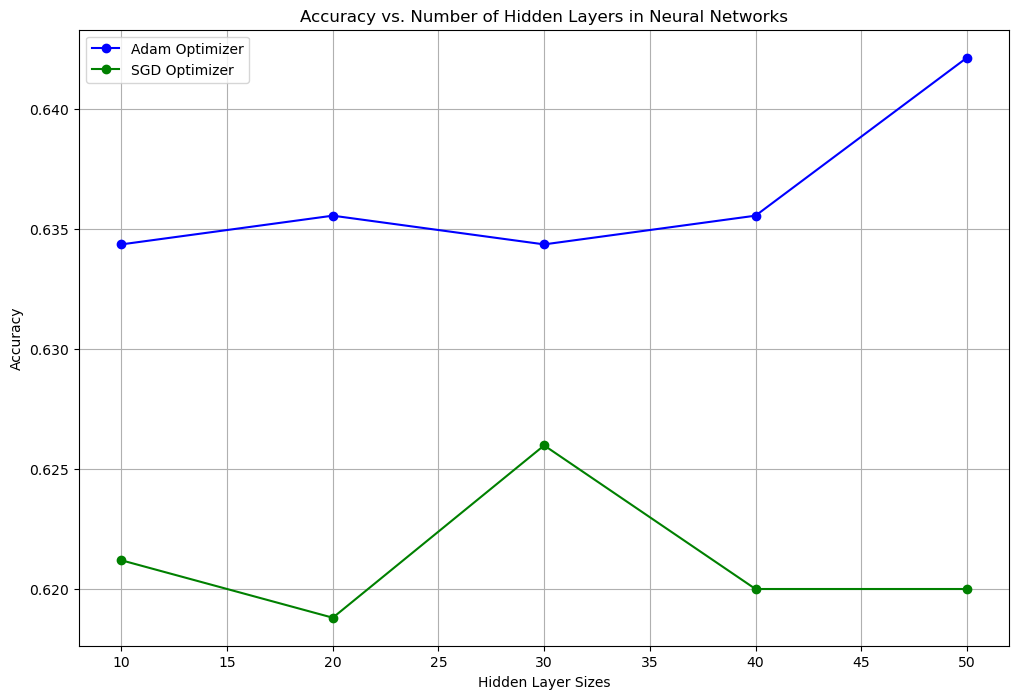

In [18]:
from sklearn.neural_network import MLPClassifier

# Define a range of hidden layer sizes for neural networks
hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,)]

# Lists to store accuracy scores for each optimizer
adam_accuracy_scores = []
sgd_accuracy_scores = []

# Train neural networks with Adam and SGD optimizers and record accuracy
for hidden_layers in hidden_layer_sizes:
    # Neural Network with Adam optimizer
    adam_clf = MLPClassifier(hidden_layer_sizes=hidden_layers, solver='adam', random_state=4,max_iter=1000)
    adam_clf.fit(X_train, y_train)
    adam_pred = adam_clf.predict(X_test)
    adam_accuracy = accuracy_score(y_test, adam_pred)
    adam_accuracy_scores.append(adam_accuracy)

    # Neural Network with SGD optimizer
    sgd_clf = MLPClassifier(hidden_layer_sizes=hidden_layers, solver='sgd', random_state=4,max_iter=2000)
    sgd_clf.fit(X_train, y_train)
    sgd_pred = sgd_clf.predict(X_test)
    sgd_accuracy = accuracy_score(y_test, sgd_pred)
    sgd_accuracy_scores.append(sgd_accuracy)

# Plot the accuracy scores vs. the number of hidden layers for each optimizer
plt.figure(figsize=(12, 8))

plt.plot(hidden_layer_sizes, adam_accuracy_scores, marker='o', linestyle='-', color='b', label='Adam Optimizer')
plt.plot(hidden_layer_sizes, sgd_accuracy_scores, marker='o', linestyle='-', color='g', label='SGD Optimizer')

plt.title('Accuracy vs. Number of Hidden Layers in Neural Networks')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("Accuracy vs. Number of Hidden Layers in Neural Networks.jpg")
plt.show()


In [19]:
adam_accuracy_test=[]
adam_clf = MLPClassifier(hidden_layer_sizes=40, solver='adam', random_state=4,max_iter=1000)

for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    adam_clf.fit(X_train, y_train)
    adam_clf_accuracy=adam_clf.score(X_test,y_test)
    adam_accuracy_test.append(adam_clf_accuracy)
    
adam_avg_accuracy_test = np.mean(adam_accuracy_test)
adam_std_accuracy_test = np.std(adam_accuracy_test)

print("MLPClassifier(adam)")
print("Average accuracy (Test): {:.4f} ± {:.4f}".format(adam_avg_accuracy_test, adam_std_accuracy_test))


MLPClassifier(adam)
Average accuracy (Test): 0.6423 ± 0.0089


In [20]:
#Apply the above steps for the Abalone regression problem. 
y = abalone_data['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

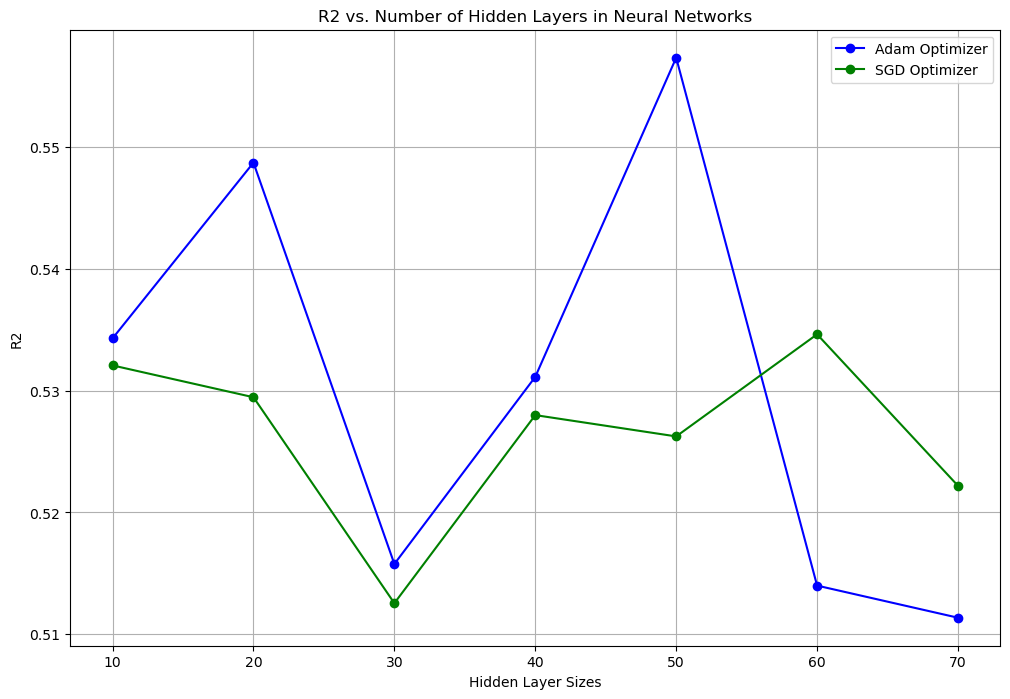

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Define a range of hidden layer sizes for neural networks
hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,),(60,),(70,)]

# Lists to store r2 scores for each optimizer
adam_r2_scores = []
sgd_r2_scores = []

# Train neural networks with Adam and SGD optimizers and record accuracy
for hidden_layers in hidden_layer_sizes:
    # Neural Network with Adam optimizer
    adam_clf = MLPRegressor(hidden_layer_sizes=hidden_layers, solver='adam', random_state=4,max_iter=1000)
    adam_clf.fit(X_train, y_train)
    adam_pred = adam_clf.predict(X_test)
    adam_r2 = r2_score(y_test, adam_pred)
    adam_r2_scores.append(adam_r2)

    # Neural Network with SGD optimizer
    sgd_clf = MLPRegressor(hidden_layer_sizes=hidden_layers, solver='sgd', random_state=4,max_iter=500)
    sgd_clf.fit(X_train, y_train)
    sgd_pred = sgd_clf.predict(X_test)
    sgd_r2 = r2_score(y_test, sgd_pred)
    sgd_r2_scores.append(sgd_r2)

# Plot the r2 scores vs. the number of hidden layers for each optimizer
plt.figure(figsize=(12, 8))

plt.plot(hidden_layer_sizes, adam_r2_scores, marker='o', linestyle='-', color='b', label='Adam Optimizer')
plt.plot(hidden_layer_sizes, sgd_r2_scores, marker='o', linestyle='-', color='g', label='SGD Optimizer')

plt.title('R2 vs. Number of Hidden Layers in Neural Networks')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('R2')
plt.legend()
plt.grid(True)
plt.savefig("R2 vs. Number of Hidden Layers in Neural Networks.jpg")
plt.show()

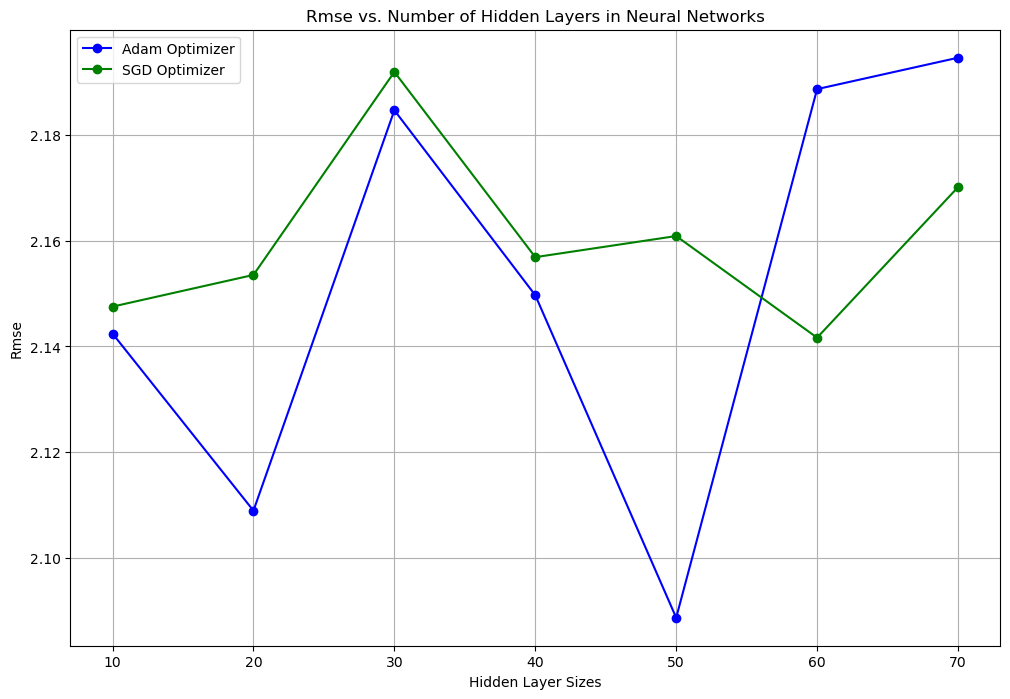

In [22]:
# Lists to store rmse scores for each optimizer
adam_rmse_scores = []
sgd_rmse_scores = []

# Train neural networks with Adam and SGD optimizers and record accuracy
for hidden_layers in hidden_layer_sizes:
    # Neural Network with Adam optimizer
    adam_clf = MLPRegressor(hidden_layer_sizes=hidden_layers, solver='adam', random_state=4,max_iter=1000)
    adam_clf.fit(X_train, y_train)
    adam_pred = adam_clf.predict(X_test)
    adam_rmse = np.sqrt(mean_squared_error(y_test, adam_pred))
    adam_rmse_scores.append(adam_rmse)

    # Neural Network with SGD optimizer
    sgd_clf = MLPRegressor(hidden_layer_sizes=hidden_layers, solver='sgd', random_state=4,max_iter=500)
    sgd_clf.fit(X_train, y_train)
    sgd_pred = sgd_clf.predict(X_test)
    sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_pred))
    sgd_rmse_scores.append(sgd_rmse)

# Plot the rmse scores vs. the number of hidden layers for each optimizer
plt.figure(figsize=(12, 8))

plt.plot(hidden_layer_sizes, adam_rmse_scores, marker='o', linestyle='-', color='b', label='Adam Optimizer')
plt.plot(hidden_layer_sizes, sgd_rmse_scores, marker='o', linestyle='-', color='g', label='SGD Optimizer')

plt.title('Rmse vs. Number of Hidden Layers in Neural Networks')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Rmse')
plt.legend()
plt.grid(True)
plt.savefig("Rmse vs. Number of Hidden Layers in Neural Networks.jpg")
plt.show()

In [23]:
r2_train=[]
rmse_train=[]
r2_test=[]
rmse_test=[]
re_mlp = MLPRegressor(hidden_layer_sizes=50, solver='adam', random_state=4,max_iter=1000)
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
    re_mlp.fit(X_train, y_train)
    y_train_pred = re_mlp.predict(X_train)
    y_test_pred = re_mlp.predict(X_test)
    #Calculate RMSE and R2 of the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    r2_train.append(train_r2)
    rmse_train.append(train_rmse)
    #Calculate RMSE and R2 of the testing set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    r2_test.append(test_r2)
    rmse_test.append(test_rmse)
    
avg_r2_train = np.mean(r2_train)
std_r2_train = np.std(r2_train)
avg_r2_test = np.mean(r2_test)
std_r2_test = np.std(r2_test)

avg_rmse_train = np.mean(rmse_train)
std_rmse_train = np.std(rmse_train)
avg_rmse_test = np.mean(rmse_test)
std_rmse_test = np.std(rmse_test)


print("Average r2 (Train): {:.4f} ± {:.4f}".format(avg_r2_train, std_r2_train))
print("Average r2 (Test): {:.4f} ± {:.4f}".format(avg_r2_test, std_r2_test))

print("Average rmse (Train): {:.4f} ± {:.4f}".format(avg_rmse_train, std_rmse_train))
print("Average rmse (Test): {:.4f} ± {:.4f}".format(avg_rmse_test, std_rmse_test))

Average r2 (Train): 0.5721 ± 0.0206
Average r2 (Test): 0.5526 ± 0.0185
Average rmse (Train): 2.1051 ± 0.0487
Average rmse (Test): 2.1590 ± 0.0579
